In [71]:
import pyfado
import os
import matplotlib.pyplot as plt
from pprint import pprint
from astropy.modeling import models, fitting
import astropy.units as u

In [4]:
spec_name = "spec_wcs1d_p17q10_new_der.fits.output3"
path = "/home/mverdugo/work/MyCodes/pyFADO/data"
path = os.path.join(path,spec_name)


In [5]:
fado  = pyfado.FadoLoad(path)
oned = pyfado.OneD(fado)
emlines = pyfado.EmLines(fado)

(4500, 7000)

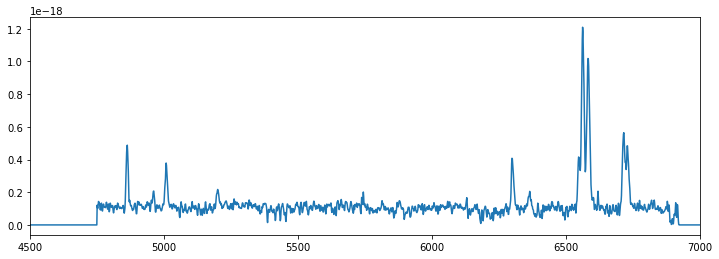

In [21]:
fig = plt.figure(figsize=(12,4))
sp = oned.spectrum()
plt.plot(sp.wavelength, sp.flux)
plt.xlim(4500,7000)

In [43]:
pprint(emlines.results('[OIII]_5006'))
pprint(emlines.results('[SII]_6716'))
pprint(emlines.results('[SII]_6730'))

{'amplitude': <Quantity 2.58852956e-19 erg / (Angstrom cm2 s)>,
 'ew': <Quantity 26.891813 Angstrom>,
 'flux': <Quantity 2.87733159e-18 erg / (Angstrom cm2 s)>,
 'lambda': <Quantity 5006.016 Angstrom>,
 'shift': <Quantity -0.04742077 Angstrom>,
 'sigma': <Quantity 4.434522 Angstrom>,
 'vel': <Quantity 141.19435 km / s>}
{'amplitude': <Quantity 4.56986263e-19 erg / (Angstrom cm2 s)>,
 'ew': <Quantity 51.338936 Angstrom>,
 'flux': <Quantity 5.06710054e-18 erg / (Angstrom cm2 s)>,
 'lambda': <Quantity 6714.217 Angstrom>,
 'shift': <Quantity 0.00117826 Angstrom>,
 'sigma': <Quantity 4.4235044 Angstrom>,
 'vel': <Quantity 53.870983 km / s>}
{'amplitude': <Quantity 3.54362971e-19 erg / (Angstrom cm2 s)>,
 'ew': <Quantity 52.27212 Angstrom>,
 'flux': <Quantity 5.04532523e-18 erg / (Angstrom cm2 s)>,
 'lambda': <Quantity 6729.037 Angstrom>,
 'shift': <Quantity 0.00117826 Angstrom>,
 'sigma': <Quantity 5.6800337 Angstrom>,
 'vel': <Quantity 53.870983 km / s>}


(6500, 7000)

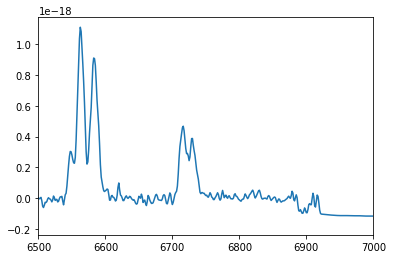

In [47]:
sp_best = oned.spectrum("best fit")
sp_nocont = sp - sp_best
plt.plot(sp_nocont.wavelength, sp_nocont.flux)
plt.xlim(6500, 7000)

In [82]:
flux_unit = u.Unit("erg / (Angstrom cm**2 s)")
gaussian1 = models.Gaussian1D(amplitude=1, mean=6714.217*u.AA, stddev=4.434522*u.AA,
                             fixed={'mean': True, 'stddev': True}) 
gaussian2 = models.Gaussian1D(amplitude=1, mean=6729.037*u.AA, stddev=4.434522*u.AA,
                              fixed={'mean': True, 'stddev': True}) 

gg_init = gaussian1 + gaussian2

In [83]:
x = sp_nocont.wavelength
y = sp_nocont.flux / 1e-18
fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, x, y)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 66.14958494543573
            Iterations: 5
            Function evaluations: 22
            Gradient evaluations: 5


(6500, 7000)

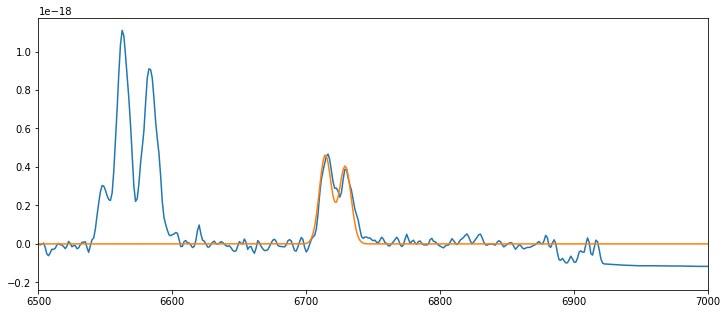

In [87]:

plt.figure(figsize=(12,5))
plt.plot(sp_nocont.wavelength, sp_nocont.flux)
plt.plot(sp_nocont.wavelength, gg_fit(sp_nocont.wavelength)*1e-18)
plt.xlim(6500, 7000)